# Домашняя работа №2

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import math
import sympy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

import numpy as np
from scipy.optimize import approx_fprime
%matplotlib inline


### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


4*sin(2x + 1)*cos(2x + 1)

8cos^2(2x + 1) - 8sin^2(2x + 1)

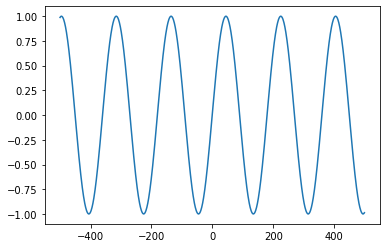

In [27]:
x = np.array([i for i in range(-500, 500)])
y = np.array([math.sin(math.radians(2*x_i+1)) for x_i in x])
plt.plot(x, y)

In [28]:
list_der_sin = []
for i in range(len(x)-1):
    list_der_sin.append((y[i+1]-y[i])/(x[i+1]-x[i]))
list_der_sin.append(list_der_sin[-1])

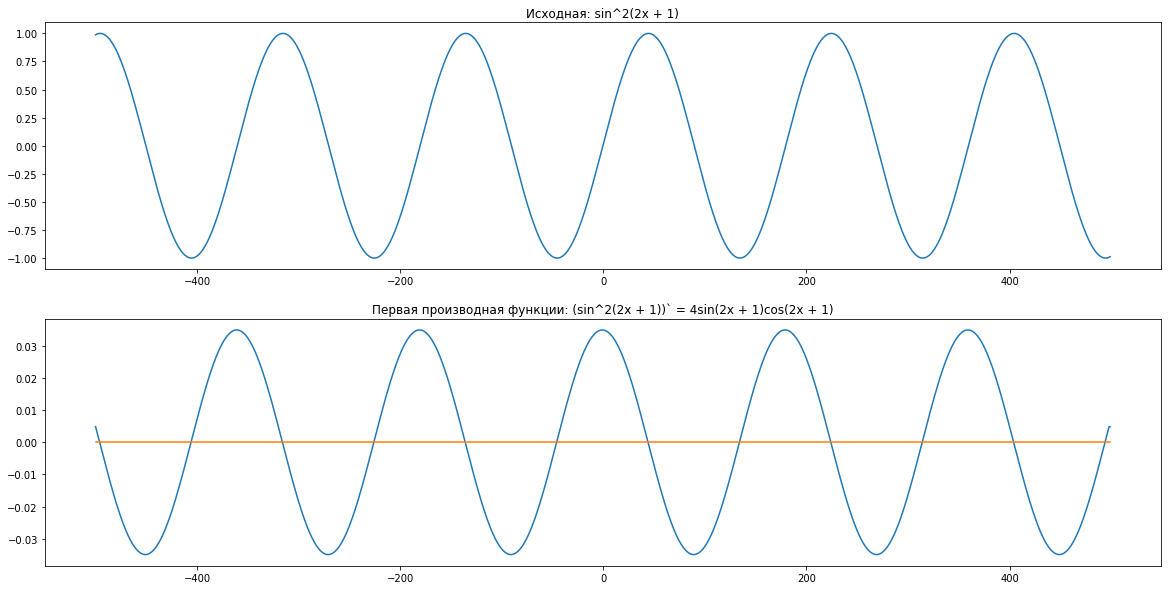

In [32]:
fig, axs = plt.subplots(2,figsize=(20,10))
axs[0].set_title('Исходная: sin^2(2x + 1)')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: (sin^2(2x + 1))` = 4sin(2x + 1)cos(2x + 1)')
axs[1].plot(x, list_der_sin)
axs[1].plot(x, [0 for i in range(len(list_der_sin))], '-')

In [39]:
list_second_der_sin = []
for i in range(len(x)-1):
    list_second_der_sin.append((list_der_sin[i+1]-list_der_sin[i])/(x[i+1]-x[i]))
list_second_der_sin.append(list_second_der_sin[-1])

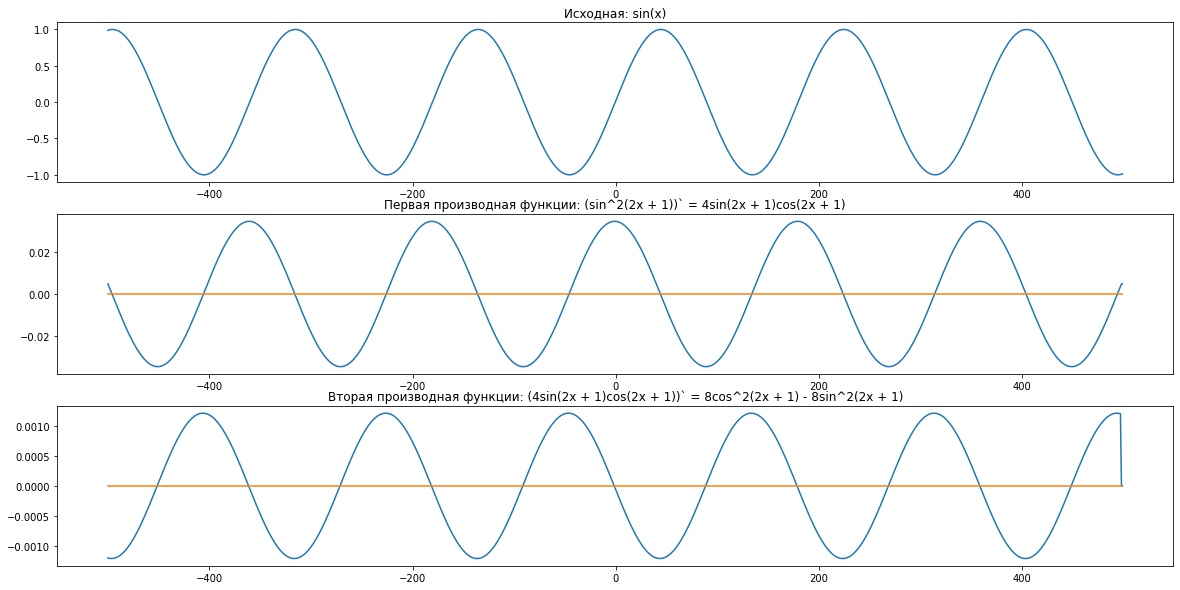

In [41]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная: sin(x)')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: (sin^2(2x + 1))` = 4sin(2x + 1)cos(2x + 1)')
axs[1].plot(x, list_der_sin)
axs[1].plot(x, [0 for i in range(len(list_der_sin))], '-')
axs[2].set_title('Вторая производная функции: (4sin(2x + 1)cos(2x + 1))` = 8cos^2(2x + 1) - 8sin^2(2x + 1)')
axs[2].plot(x, list_second_der_sin)
axs[2].plot(x, [0 for i in range(len(list_der_sin))], '-')

### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [44]:
def func(x, c0, c1, c2 ):
    return c0 * x[0]**2 * x[1]**3 + c1 * 1/x[0] + c2*x[1]**2 * x[0] 

In [45]:
x = np.array([1, 2])
c0, c1, c2 = (2, 1, 1)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1, c2) #eps снова о секущей

array([35.00000024, 28.00000024])

In [46]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sympy import *
x, y = symbols('x y')

In [48]:
diff(2*x**2*y**3 + 1/x + x*y**2 + 7, x)

4*x*y**3 + y**2 - 1/x**2

In [49]:
diff(2*x**2*y**3 + 1/x + x*y**2 + 7, y)

6*x**2*y**2 + 2*x*y

In [27]:
x

array([1, 2])

### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [1]:
import pandas as pd
data = pd.read_csv('data/video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


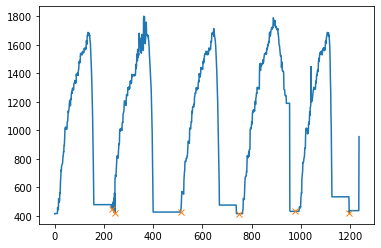

In [54]:
peaks, _ = find_peaks(-data.height, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()

### Задание 4:

Градиентный спуск своими руками

In [70]:
def f(x):
    return (x[0]**2) + (x[1]**2) 

In [71]:
x = np.array([100, 200])
lr = 0.1

In [72]:
for i in range(100):
    # Calculate gradient
    eps = np.sqrt(np.finfo(float).eps)
    grad = approx_fprime(x, f, [eps, eps])
    # Update x with gradient
    x = x - grad*lr

In [73]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [1.29197811e-08 3.32901401e-08]
Значение функции в минимуме:  1.2751541739575636e-15


проверка с помощью scipy 

In [74]:
res = minimize(f, [2,5], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 64
         Function evaluations: 121
